# **Estimation of Obesity Levels Based on Eating Habits and Physical Condition | HubbleMind**

In [1]:
import pandas as pd

## <span style="color:DarkSlateGray">Week 1 : Data Importing and Cleaning</span>

### *Task 1 :*<span style="color:blue"> Data Import And Inspect the structure, types, and check for missing values</span>

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head(5)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### *Task 2 :*<span style="color:blue"> Data Type Conversion and Encoding</span>

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding for binary variables
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
for col in binary_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['MTRANS', 'CAEC', 'CALC', 'NObeyesdad'])

In [6]:
df.head(5)

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   

   NCP  SMOKE  CH2O  ...  CALC_Frequently  CALC_Sometimes  CALC_no  \
0  3.0      0   2.0  ...            False           False     True   
1  3.0      1   3.0  ...            False            True    False   
2  3.0      0   2.0  ...             True           False    False   
3  3.0      0   2.0  ...             True           False    False   
4  1.0      0   2.0  ...            False            True    False   

   NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight  \
0                           False                      True   
1                           False                      True   
2                           False                      True   
3                           False                     False   
4                           False                     False   

   NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   

   NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                           True   
4                        False                          False   

   NObeyesdad_Overweight_Level_II  
0                           False  
1                           False  
2                           False  
3                           False  
4                            True  

[5 rows x 33 columns]

### *Task 3 :* <span style="color:blue"> Outlier Detection and Handling</span>

> * **Outlier detection using seaborn boxplot**

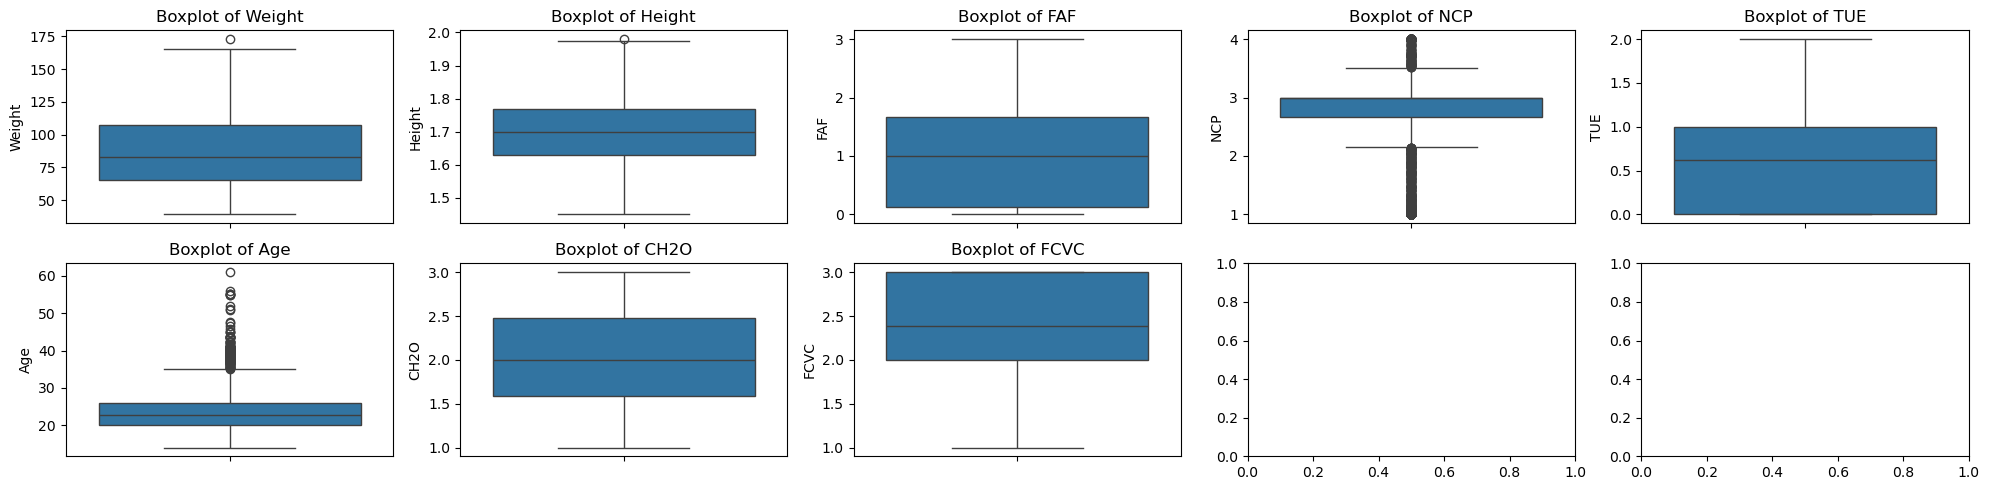

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(20, 5))

sns.boxplot(data=df['Weight'], ax=ax[0,0])
ax[0,0].set_title('Boxplot of Weight')
sns.boxplot(data=df['Height'], ax=ax[0,1])
ax[0,1].set_title('Boxplot of Height')
sns.boxplot(data=df['FAF'], ax=ax[0,2])
ax[0,2].set_title('Boxplot of FAF')
sns.boxplot(data=df['NCP'], ax=ax[0,3]) 
ax[0,3].set_title('Boxplot of NCP')
sns.boxplot(data=df['TUE'], ax=ax[0,4]) 
ax[0,4].set_title('Boxplot of TUE')
sns.boxplot(data=df['Age'], ax=ax[1,0])
ax[1,0].set_title('Boxplot of Age')
sns.boxplot(data=df['CH2O'], ax=ax[1,1])
ax[1,1].set_title('Boxplot of CH2O')
sns.boxplot(data=df['FCVC'], ax=ax[1,2])
ax[1,2].set_title('Boxplot of FCVC')

plt.tight_layout()
plt.show()

> * **Outliers handling using clip function**

In [8]:
df_updated = df.copy() 

weight_q1 = df['Weight'].quantile(0.25)
weight_q3 = df['Weight'].quantile(0.75)
weight_iqr = weight_q3 - weight_q1
weight_upper = weight_q3 + (weight_iqr * 1.5)
weight_lower = weight_q1 - (weight_iqr * 1.5)  
df_updated['Weight'] = df['Weight'].clip(lower=weight_lower, upper=weight_upper)

height_q1 = df['Height'].quantile(0.25)
height_q3 = df['Height'].quantile(0.75)
height_iqr = height_q3 - height_q1
height_upper = height_q3 + (height_iqr * 1.5) 
height_lower = height_q1 - (height_iqr * 1.5)  
df_updated['Height'] = df['Height'].clip(lower=height_lower, upper=height_upper)

NCP_q1 = df['NCP'].quantile(0.25)
NCP_q3 = df['NCP'].quantile(0.75)
NCP_iqr = NCP_q3 - NCP_q1
NCP_upper = NCP_q3 + (NCP_iqr * 1.5)
NCP_lower = NCP_q1 - (NCP_iqr * 1.5)
df_updated['NCP'] = df['NCP'].clip(lower=NCP_lower, upper=NCP_upper)

Age_q1 = df['Age'].quantile(0.25)
Age_q3 = df['Age'].quantile(0.75)
Age_iqr = Age_q3 - Age_q1
Age_upper = Age_q3 + (Age_iqr * 1.5)
Age_lower = Age_q1 - (Age_iqr * 1.5)
df_updated['Age'] = df['Age'].clip(lower=Age_lower, upper=Age_upper)

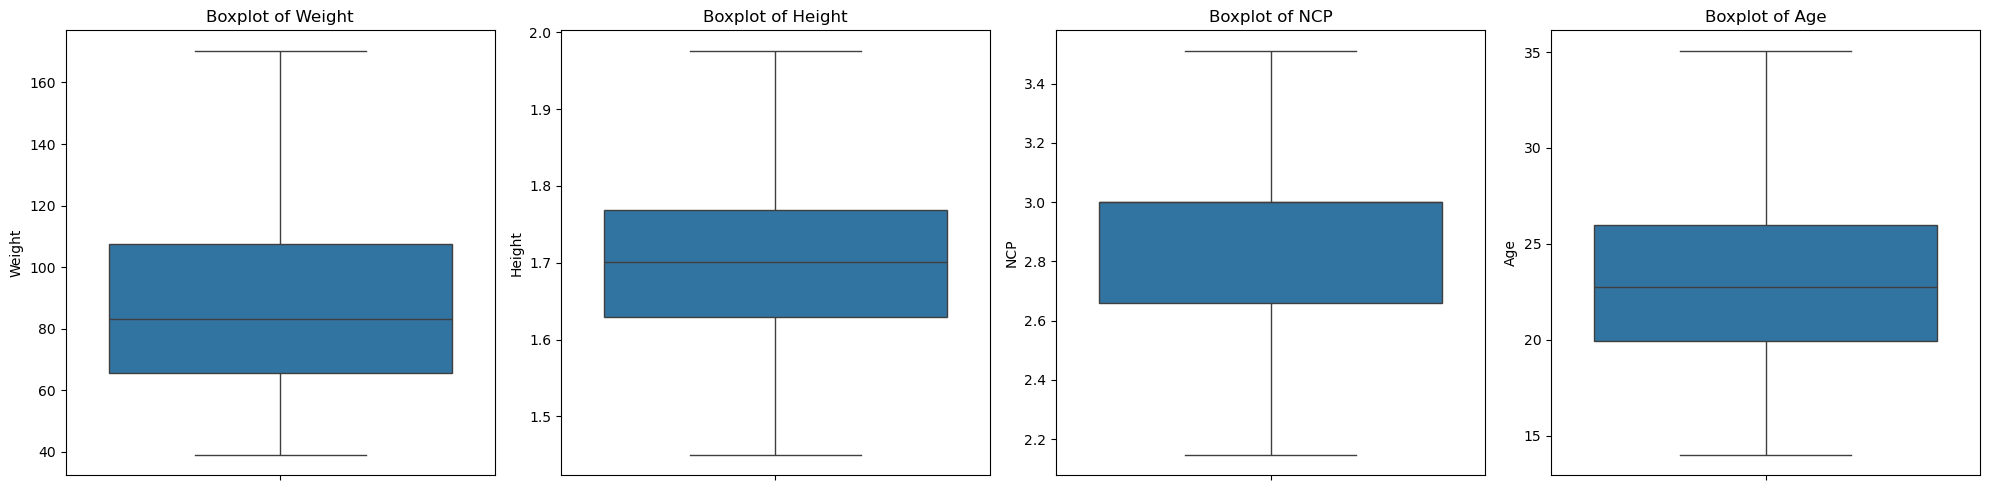

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(data=df_updated['Weight'], ax=ax[0])
ax[0].set_title('Boxplot of Weight')
sns.boxplot(data=df_updated['Height'], ax=ax[1])
ax[1].set_title('Boxplot of Height')
sns.boxplot(data=df_updated['NCP'], ax=ax[2]) 
ax[2].set_title('Boxplot of NCP')
sns.boxplot(data=df_updated['Age'], ax=ax[3]) 
ax[3].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

### *Task 4 :*<span style="color:blue">  Normalization/Standardization</span>

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_updated[['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = scaler.fit_transform(df_updated[['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])

In [11]:
df_updated.head(5)

Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.332081  0.323096  0.190307                               1     0   
1       0  0.332081  0.133039  0.129409                               1     0   
2       1  0.426961  0.665197  0.289267                               1     0   
3       1  0.616721  0.665197  0.365389                               0     0   
4       1  0.379521  0.627186  0.386704                               0     0   

   FCVC    NCP  SMOKE  CH2O  ...  CALC_Frequently  CALC_Sometimes  CALC_no  \
0   0.5  0.625      0   0.5  ...            False           False     True   
1   1.0  0.625      1   1.0  ...            False            True    False   
2   0.5  0.625      0   0.5  ...             True           False    False   
3   1.0  0.625      0   0.5  ...             True           False    False   
4   0.5  0.000      0   0.5  ...            False            True    False   

   NObeyesdad_Insufficient_Weight  NObeyesdad_Normal_Weight  \
0                           False                      True   
1                           False                      True   
2                           False                      True   
3                           False                     False   
4                           False                     False   

   NObeyesdad_Obesity_Type_I  NObeyesdad_Obesity_Type_II  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   

   NObeyesdad_Obesity_Type_III  NObeyesdad_Overweight_Level_I  \
0                        False                          False   
1                        False                          False   
2                        False                          False   
3                        False                           True   
4                        False                          False   

   NObeyesdad_Overweight_Level_II  
0                           False  
1                           False  
2                           False  
3                           False  
4                            True  

[5 rows x 33 columns]

## <span style="color:DarkSlateGray">Week 2 :  Exploratory Data Analysis (EDA)</span>

### *Task 1 :*<span style="color:blue"> Summary Statistics</span>

In [12]:
df_updated.describe()

Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921     0.470145     0.478325     0.362229   
std       0.500083     0.250362     0.177321     0.199344   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.282135     0.342101     0.201522   
50%       1.000000     0.416424     0.476089     0.334940   
75%       1.000000     0.569281     0.605261     0.520913   
max       1.000000     1.000000     1.000000     1.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     0.709522     0.504510   
std                          0.386247     0.320371     0.266963     0.293688   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          1.000000     1.000000     0.500000     0.375000   
50%                          1.000000     1.000000     0.692751     0.625000   
75%                          1.000000     1.000000     1.000000     0.625000   
max                          1.000000     1.000000     1.000000     1.000000   

             SMOKE         CH2O          SCC          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000  
mean      0.020843     0.504006     0.045476     0.336766     0.328933  
std       0.142893     0.306477     0.208395     0.283531     0.304464  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.292406     0.000000     0.041502     0.000000  
50%       0.000000     0.500000     0.000000     0.333333     0.312675  
75%       0.000000     0.738710     0.000000     0.555559     0.500000  
max       1.000000     1.000000     1.000000     1.000000     1.000000

### *Task 2 :*<span style="color:blue"> Distribution Analysis Using  Plot histograms and KDE</span>

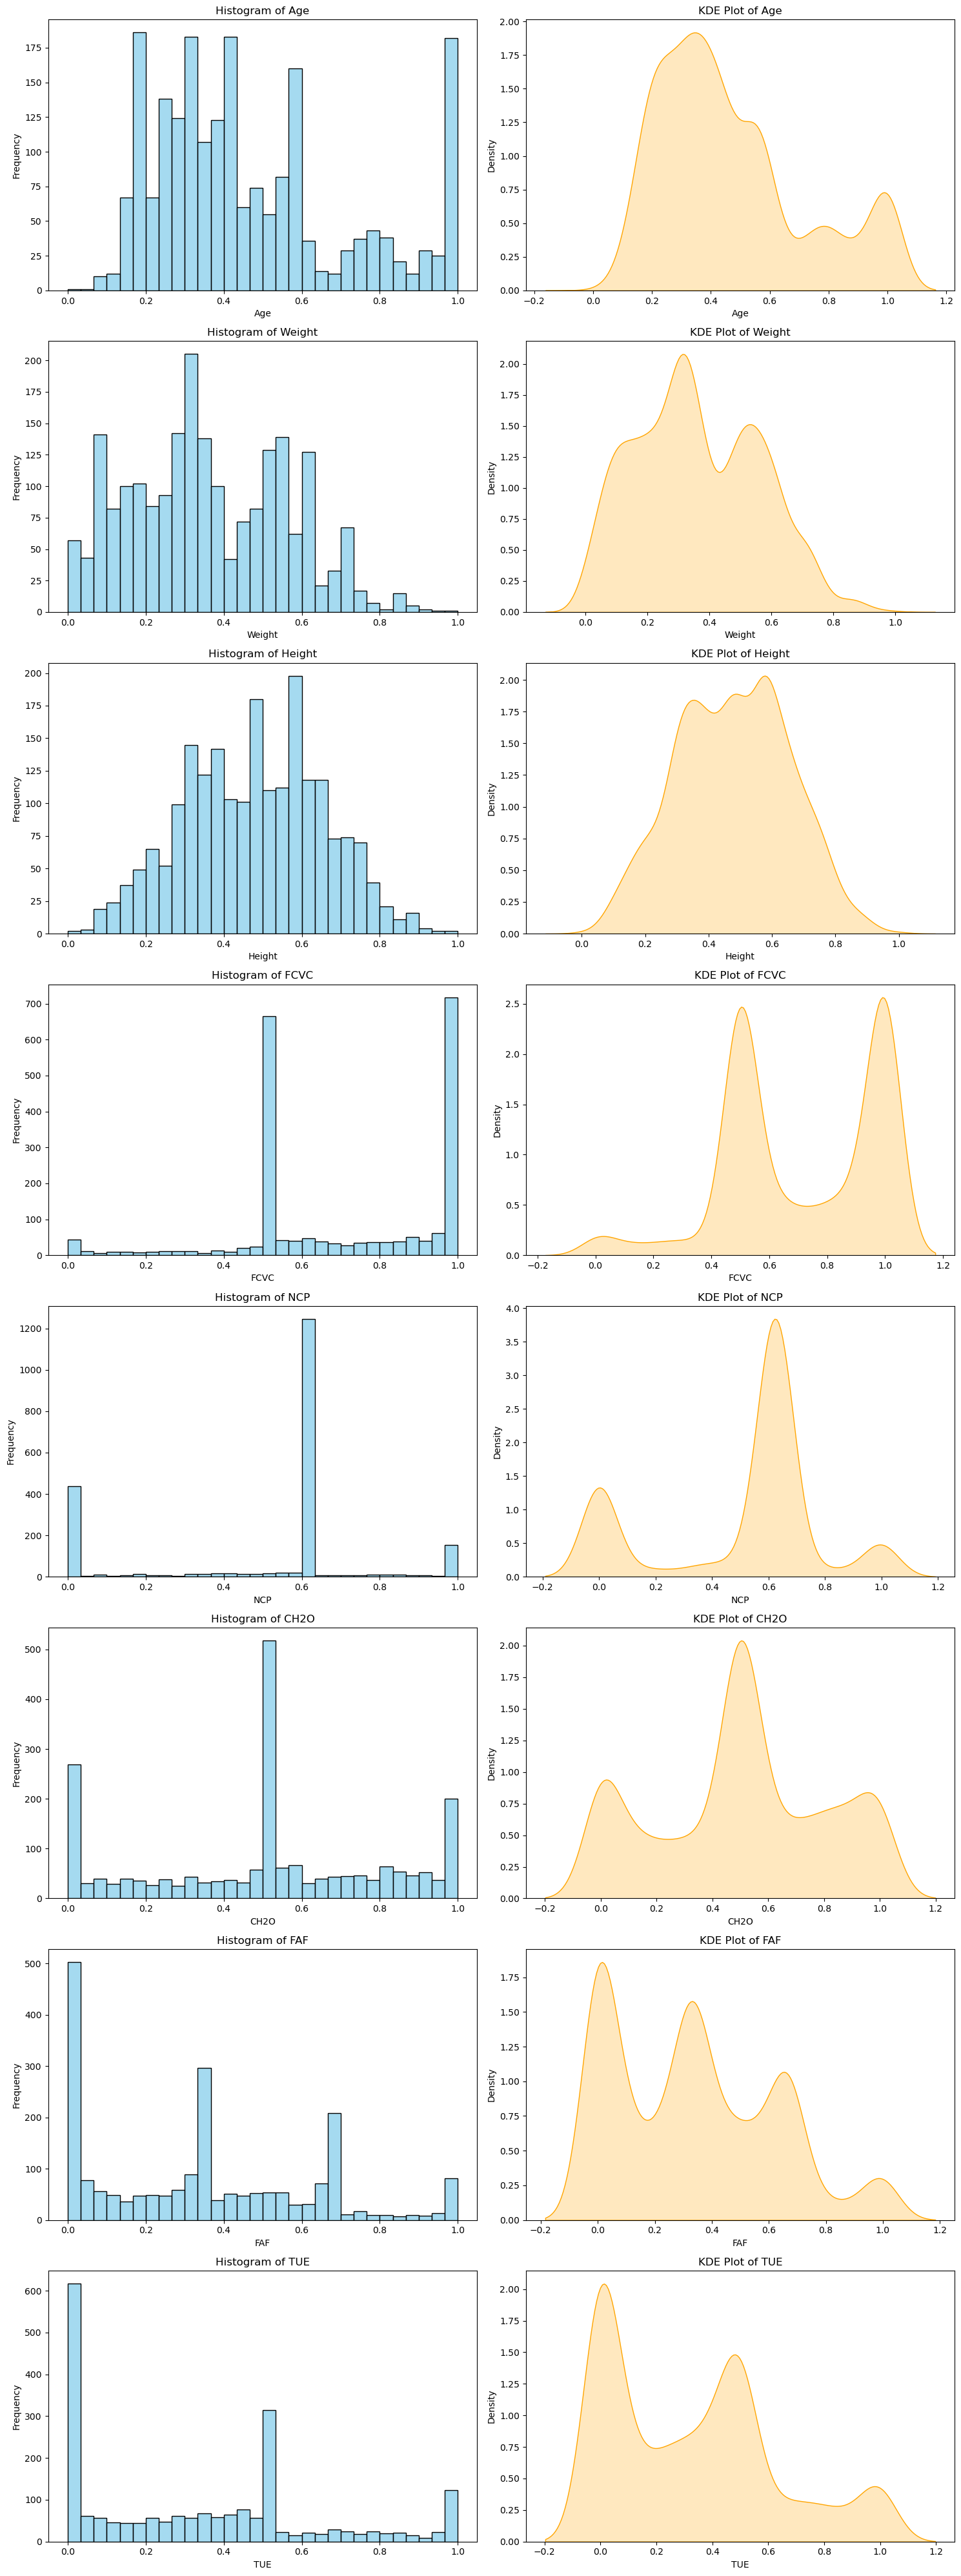

In [13]:
# List of continuous variables
all_continuous_variables = ['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Determine number of rows and columns to fit all subplots
num_vars = len(all_continuous_variables)
fig, axes = plt.subplots(nrows=num_vars, ncols=2, figsize=(15, 5 * num_vars))

# Loop through each variable and plot
for i, var in enumerate(all_continuous_variables):
    # Histogram on the left
    sns.histplot(df_updated[var], bins=30, kde=False, color='skyblue', ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequency')

    # KDE plot on the right
    sns.kdeplot(df_updated[var], color='orange', fill=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'KDE Plot of {var}')
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### *Task 3 :*<span style="color:blue"> Relationship Exploration</span>

In [14]:
# Create a single categorical column for obesity levels
obesity_columns = [
    'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight',
    'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II',
    'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
    'NObeyesdad_Overweight_Level_II'
]

# Use idxmax to find which column is True and assign it as the obesity level
df_updated['NObesity_Level'] = df_updated[obesity_columns].idxmax(axis=1)

# Check the unique categories in the new column
print(df_updated['NObesity_Level'].unique())

['NObeyesdad_Normal_Weight' 'NObeyesdad_Overweight_Level_I'
 'NObeyesdad_Overweight_Level_II' 'NObeyesdad_Obesity_Type_I'
 'NObeyesdad_Insufficient_Weight' 'NObeyesdad_Obesity_Type_II'
 'NObeyesdad_Obesity_Type_III']


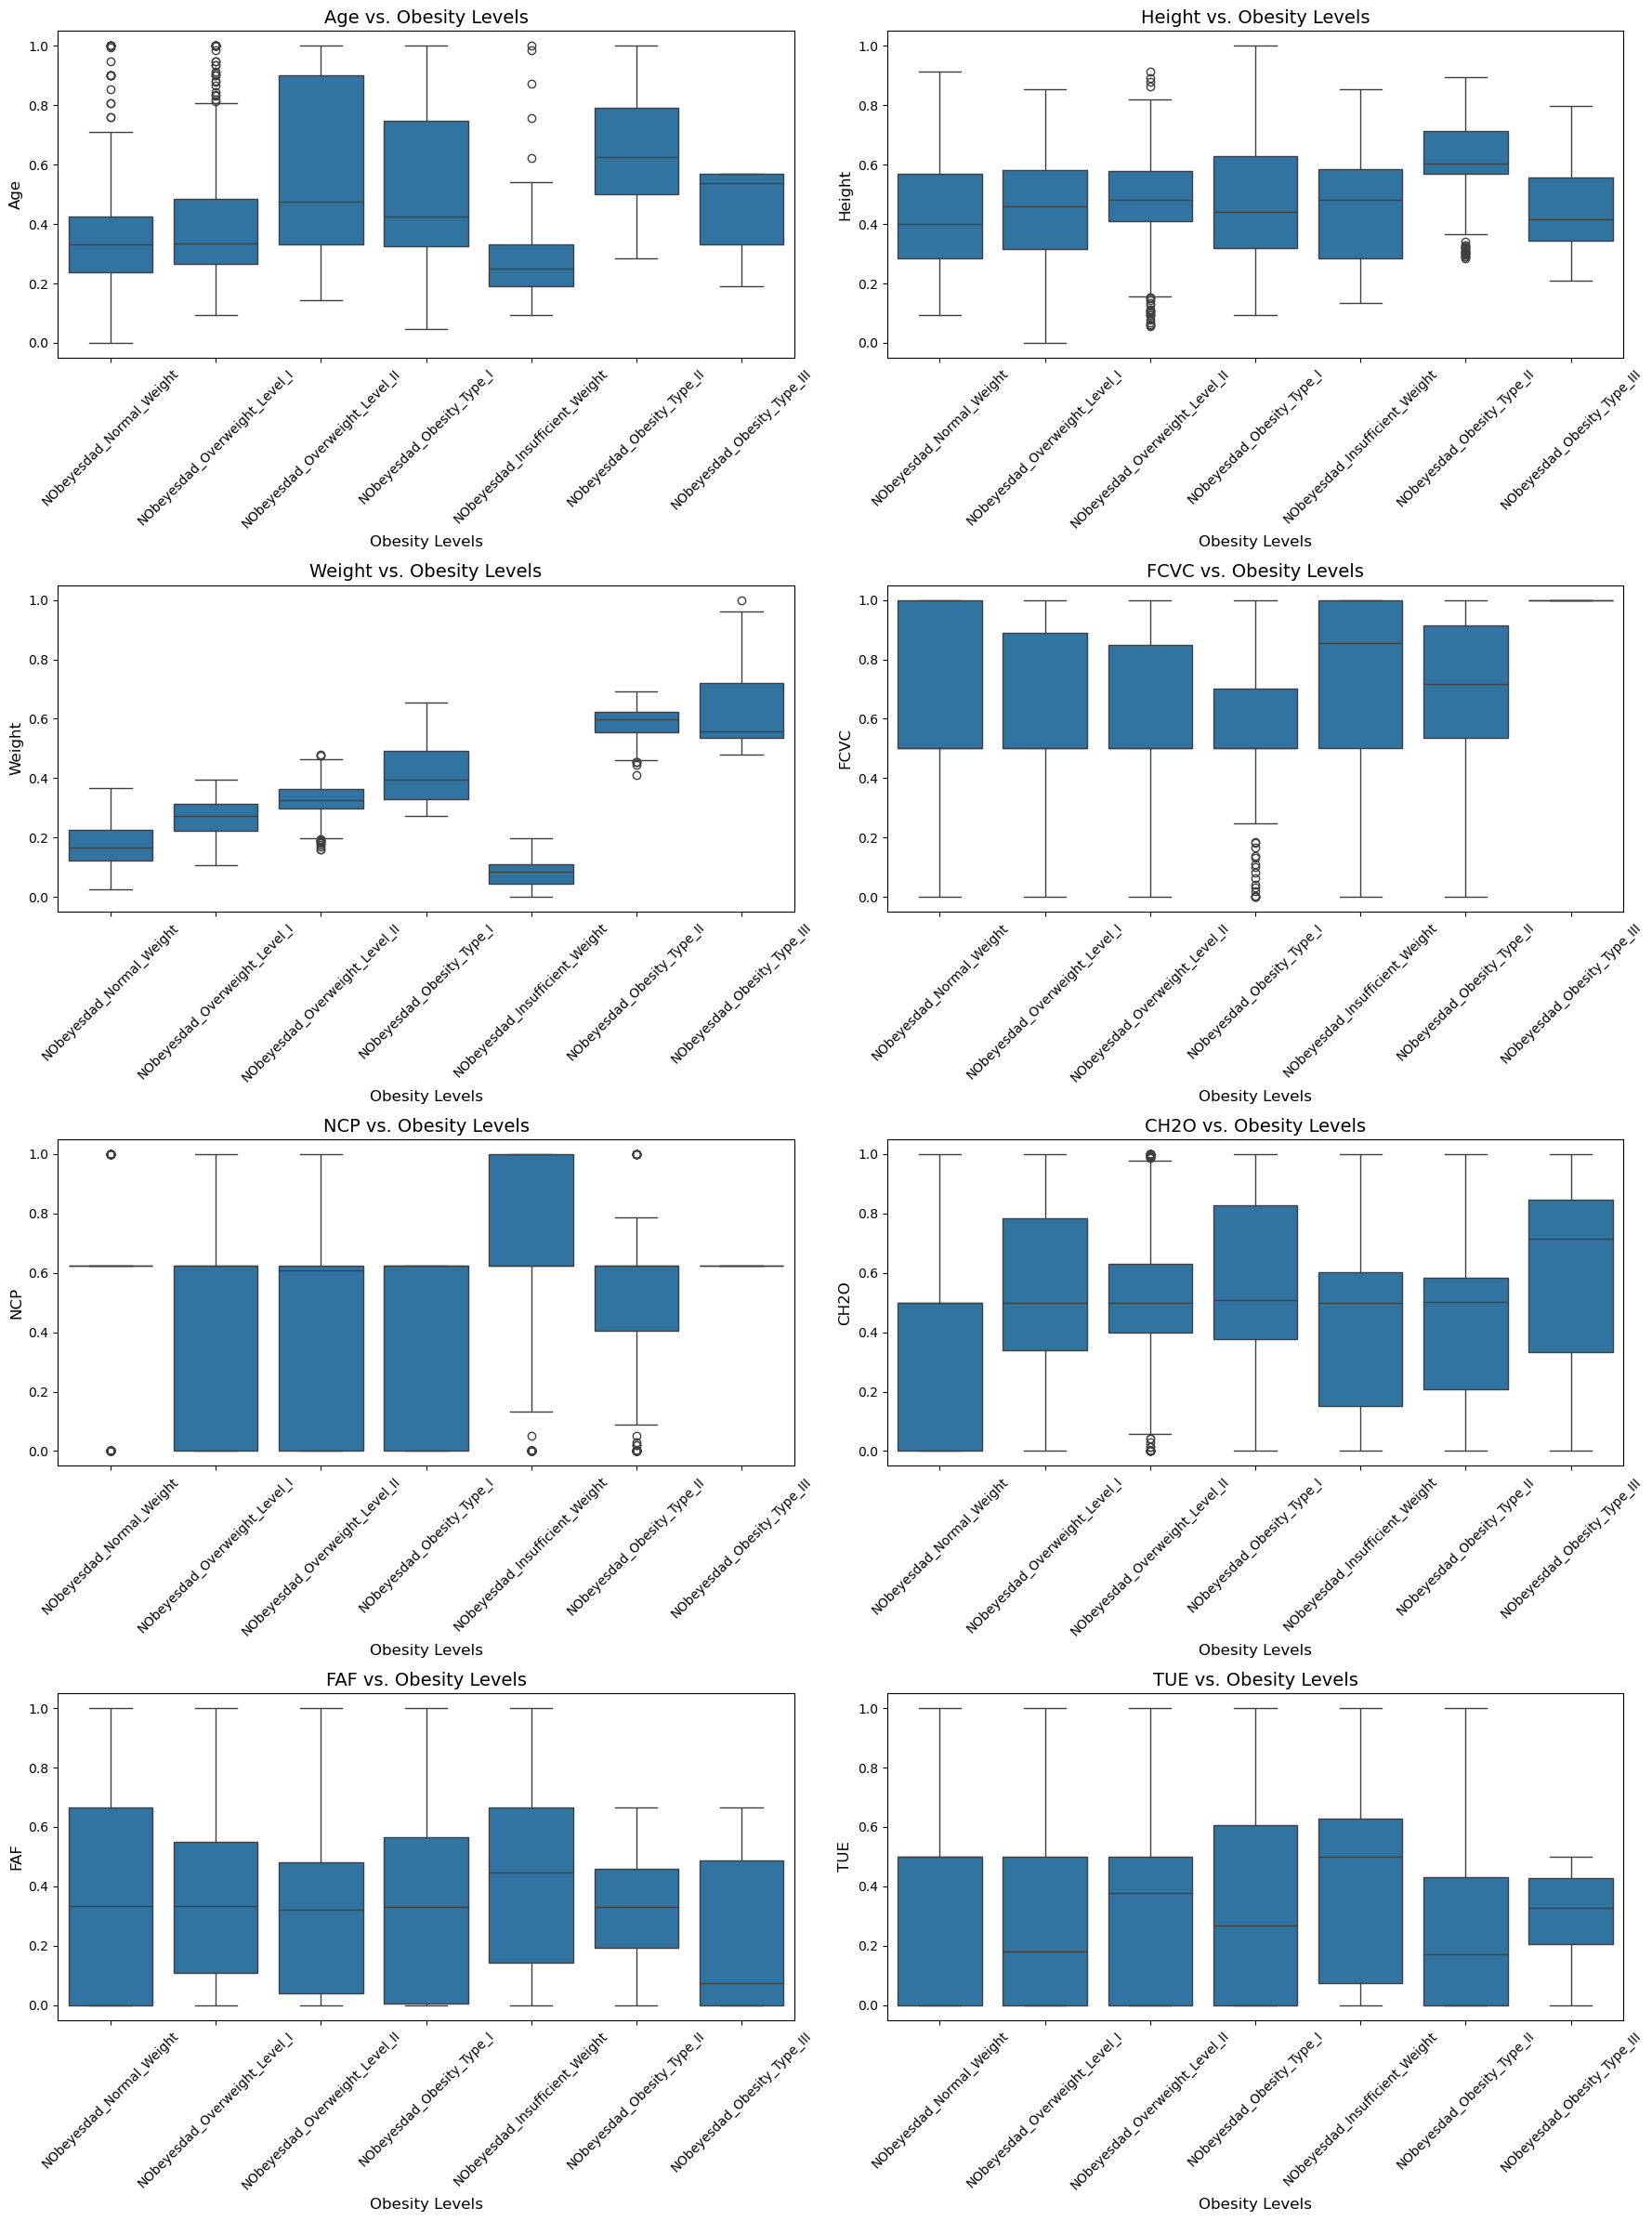

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a grid of boxplots (2 columns layout)
fig, axes = plt.subplots(nrows=len(continuous_vars) // 2, ncols=2, figsize=(18, 24))

# Loop through variables and plot
for i, var in enumerate(continuous_vars):
    row, col = divmod(i, 2)  # Calculate row and column indices
    sns.boxplot(x='NObesity_Level', y=var, data=df_updated, ax=axes[row, col])
    axes[row, col].set_title(f'{var} vs. Obesity Levels', fontsize=14)
    axes[row, col].set_xlabel('Obesity Levels', fontsize=12)
    axes[row, col].set_ylabel(var, fontsize=12)
    axes[row, col].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### *Task 4 :*<span style="color:blue">  Correlation Analysis</span>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous features from the DataFrame
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a DataFrame with just the continuous variables
df_continuous = df_updated[continuous_vars]

# Compute the correlation matrix
correlation_matrix = df_continuous.corr()

# Display the correlation matrix
print(correlation_matrix)

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.002326  0.249975  0.030874 -0.096479 -0.041606 -0.158381   
Height -0.002326  1.000000  0.463120 -0.038108  0.208636  0.213357  0.294726   
Weight  0.249975  0.463120  1.000000  0.216106  0.054791  0.200607 -0.051500   
FCVC    0.030874 -0.038108  0.216106  1.000000  0.040449  0.068461  0.019939   
NCP    -0.096479  0.208636  0.054791  0.040449  1.000000  0.058640  0.129371   
CH2O   -0.041606  0.213357  0.200607  0.068461  0.058640  1.000000  0.167236   
FAF    -0.158381  0.294726 -0.051500  0.019939  0.129371  0.167236  1.000000   
TUE    -0.294829  0.051904 -0.071599 -0.101135  0.037937  0.011965  0.058562   

             TUE  
Age    -0.294829  
Height  0.051904  
Weight -0.071599  
FCVC   -0.101135  
NCP     0.037937  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


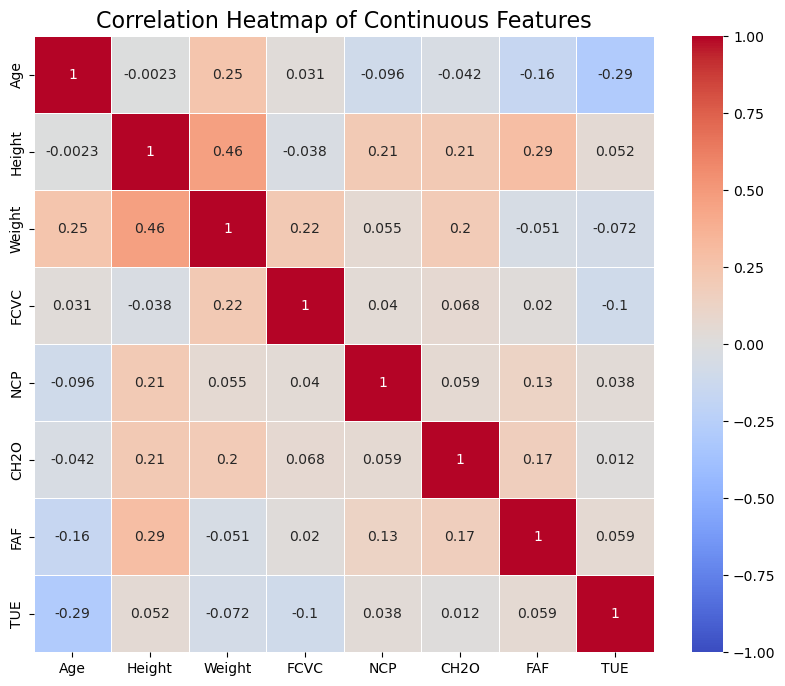

In [17]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Features', fontsize=16)
plt.show()

## <span style="color:DarkSlateGray">Week 3 : Advanced Visualizations and Machine Learning</span>

### *Task 1 :*<span style="color:blue">  Advanced Visualizations</span>

> 1. **Create Pair Plots**

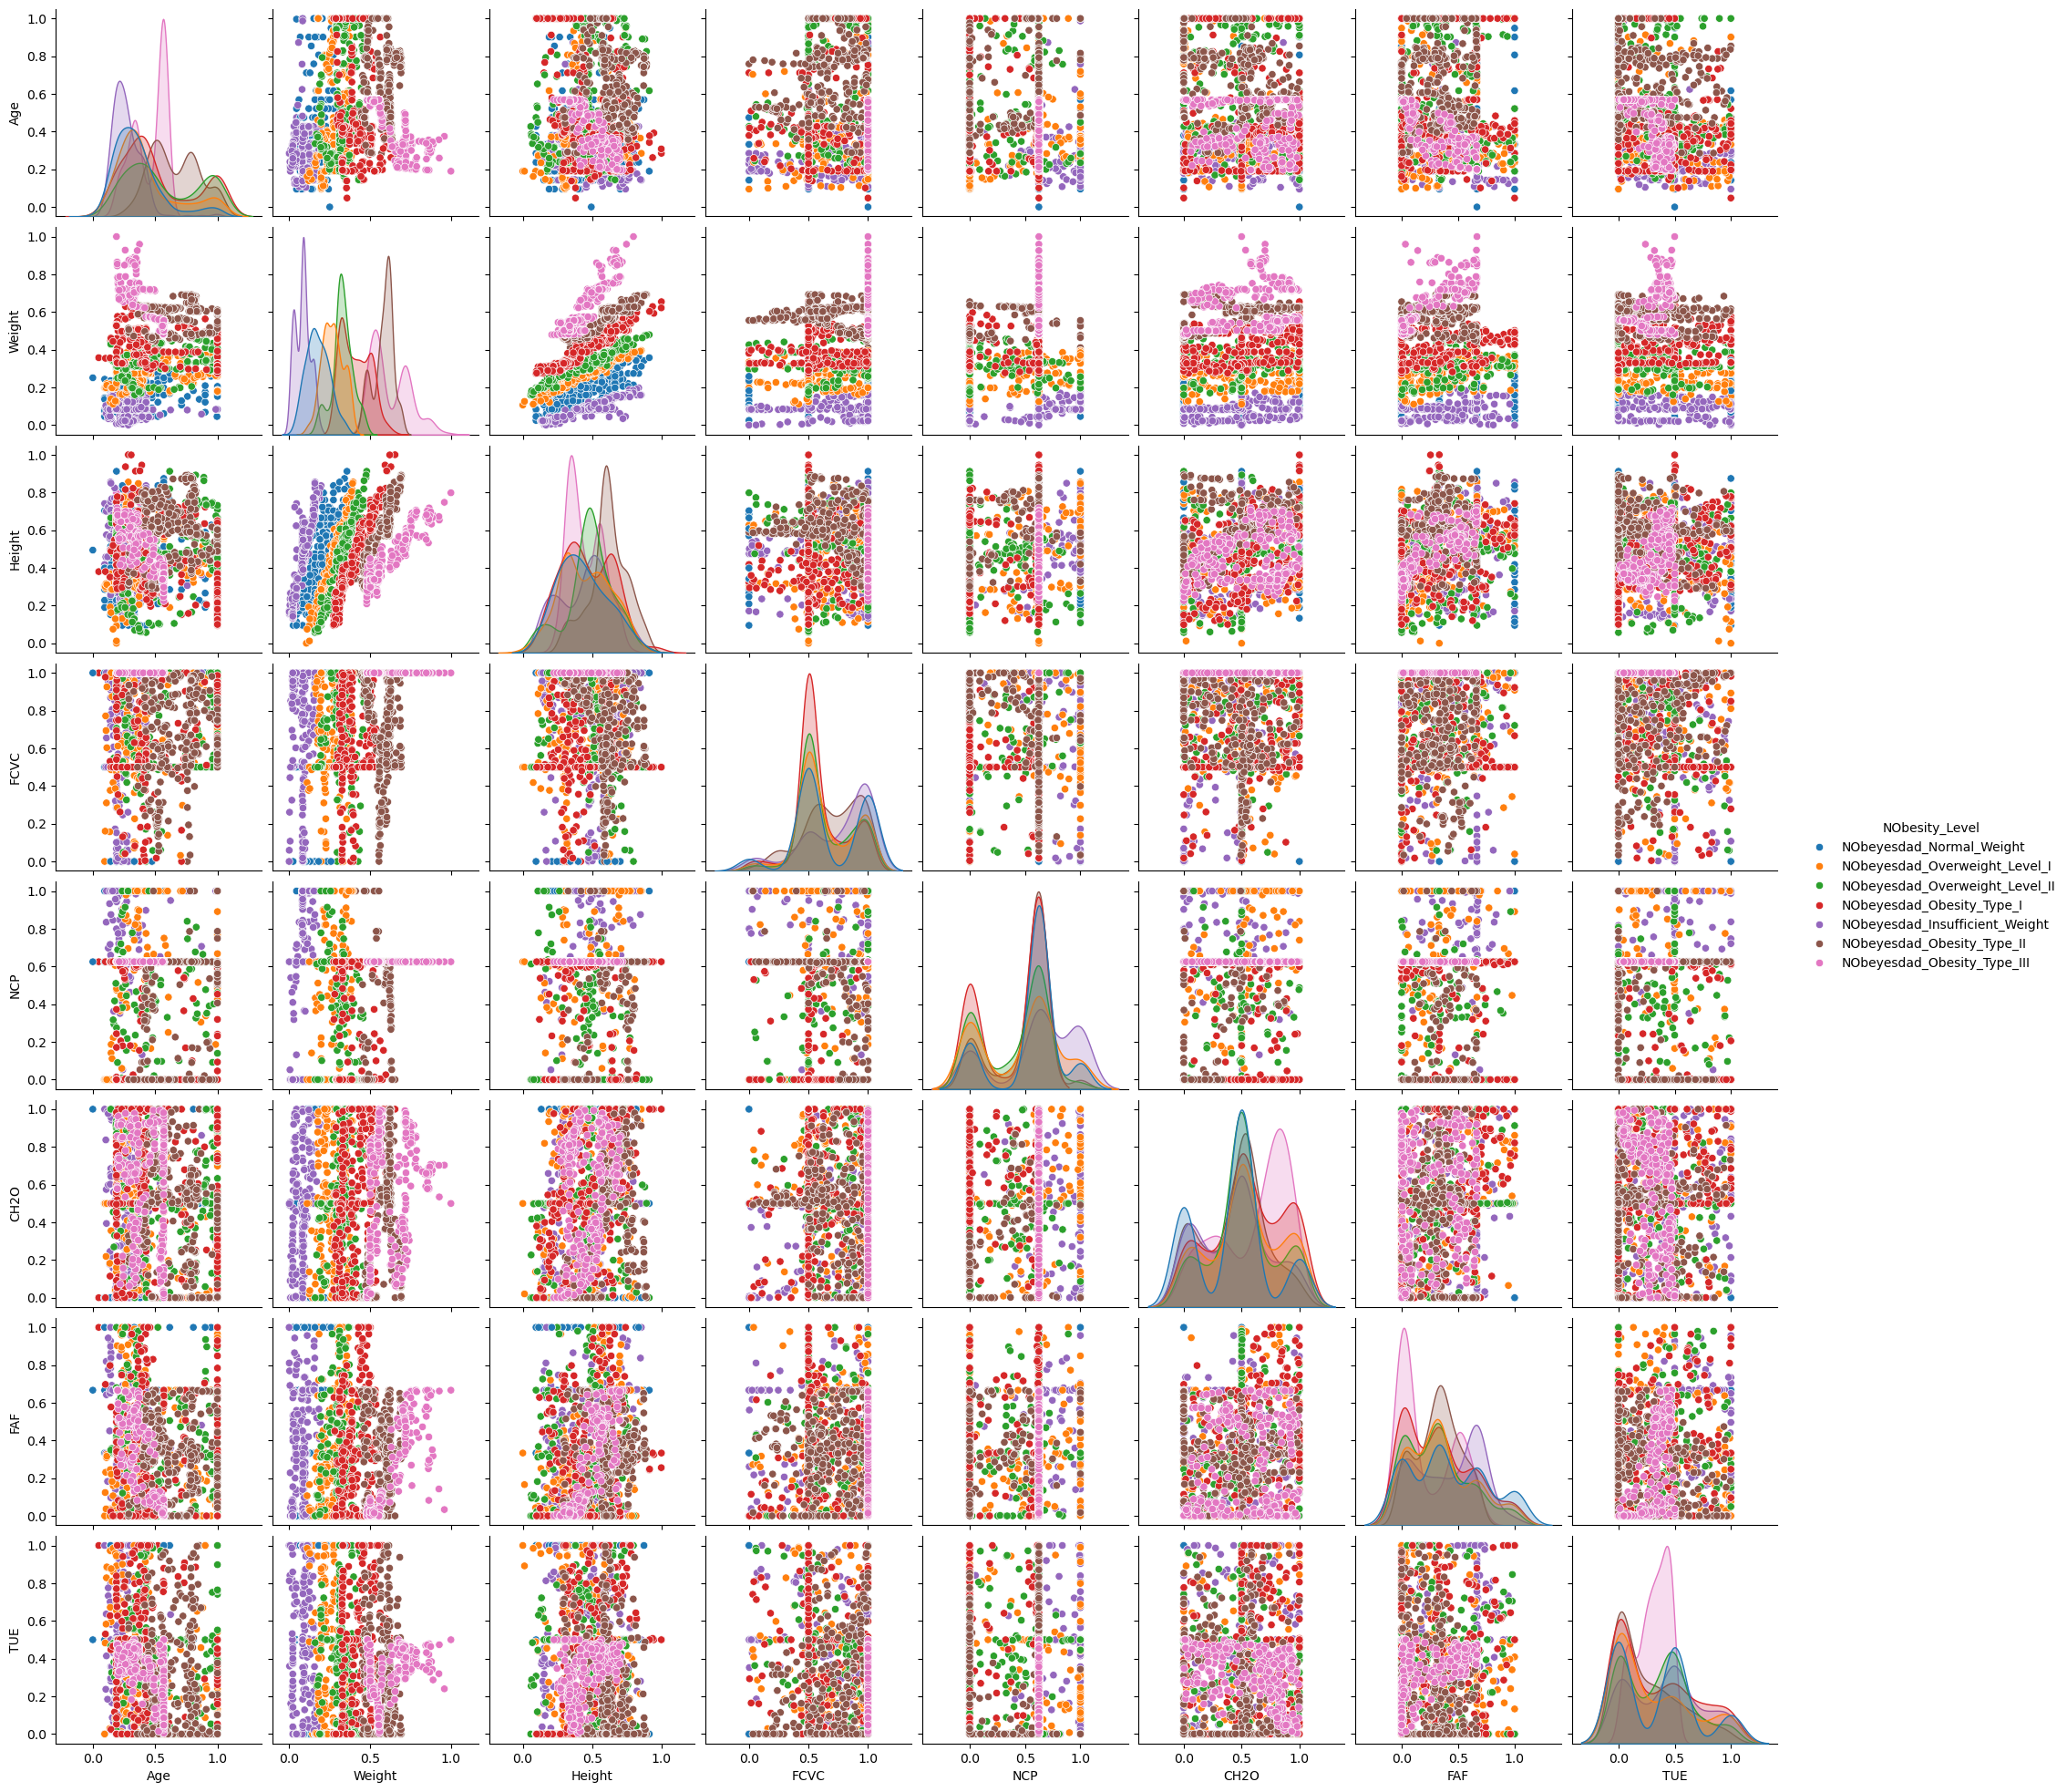

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_updated, hue='NObesity_Level', vars=['Age', 'Weight', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'])
plt.show()

> 2. **Feature Importance Plot (Using Random Forest)**

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a single target column with the obesity labels
y = df_updated[['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 
        'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 
        'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
        'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)

# Use LabelEncoder to convert string labels to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Verify encoding
print("Label Mapping:", dict(enumerate(label_encoder.classes_)))
print("Sample Encoded Target Values:", y_encoded[:10])

Label Mapping: {0: 'NObeyesdad_Insufficient_Weight', 1: 'NObeyesdad_Normal_Weight', 2: 'NObeyesdad_Obesity_Type_I', 3: 'NObeyesdad_Obesity_Type_II', 4: 'NObeyesdad_Obesity_Type_III', 5: 'NObeyesdad_Overweight_Level_I', 6: 'NObeyesdad_Overweight_Level_II'}
Sample Encoded Target Values: [1 1 1 5 6 1 1 1 1 1]


In [24]:
# Drop the target columns from the feature matrix
X = df_updated.drop(columns=['NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 
                     'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 
                     'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I',
                     'NObeyesdad_Overweight_Level_II'])

# Identify non-numeric columns in the feature matrix
non_numeric_cols = X.select_dtypes(include=['object', 'bool']).columns
print("Non-numeric columns:", non_numeric_cols)

# Use LabelEncoder to convert these columns to numeric values
for col in non_numeric_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

print("Sample of encoded features:\n", X.head())

Non-numeric columns: Index(['MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'NObesity_Level'],
      dtype='object')
Sample of encoded features:
    Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.332081  0.323096  0.190307                               1     0   
1       0  0.332081  0.133039  0.129409                               1     0   
2       1  0.426961  0.665197  0.289267                               1     0   
3       1  0.616721  0.665197  0.365389                               0     0   
4       1  0.379521  0.627186  0.386704                               0     0   

   FCVC    NCP  SMOKE  CH2O  ...  MTRANS_Walking  CAEC_Always  \
0   0.5  0.625      0   0.5  ...               0            0   
1   1.0  0.625      1   1.0  ...

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(X_test)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")

Random Forest Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


> 1.3 **Heatmap of the Confusion Matrix**

In [28]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Optional: Print the raw confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[56  0  0  0  0  0  0]
 [ 0 62  0  0  0  0  0]
 [ 0  1 77  0  0  0  0]
 [ 0  0  0 58  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0 50]]


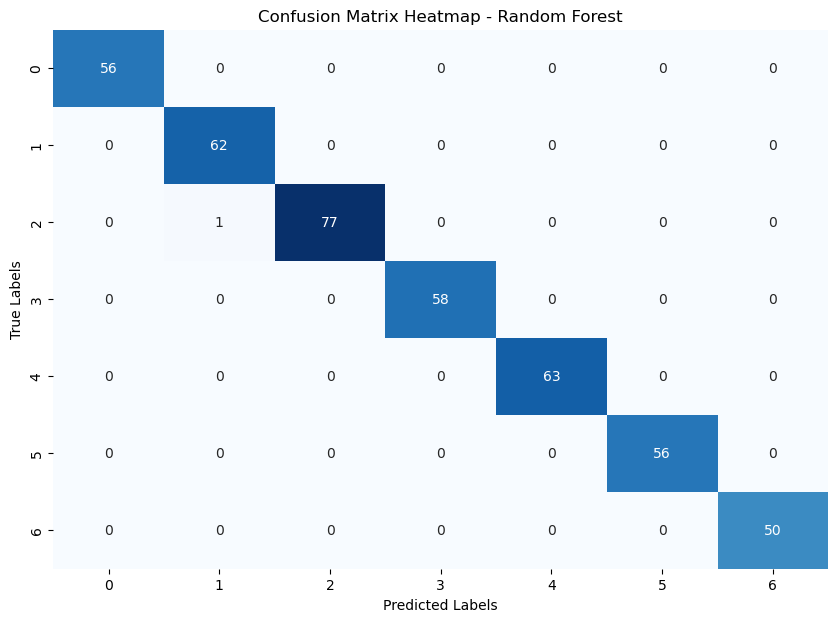

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.show()

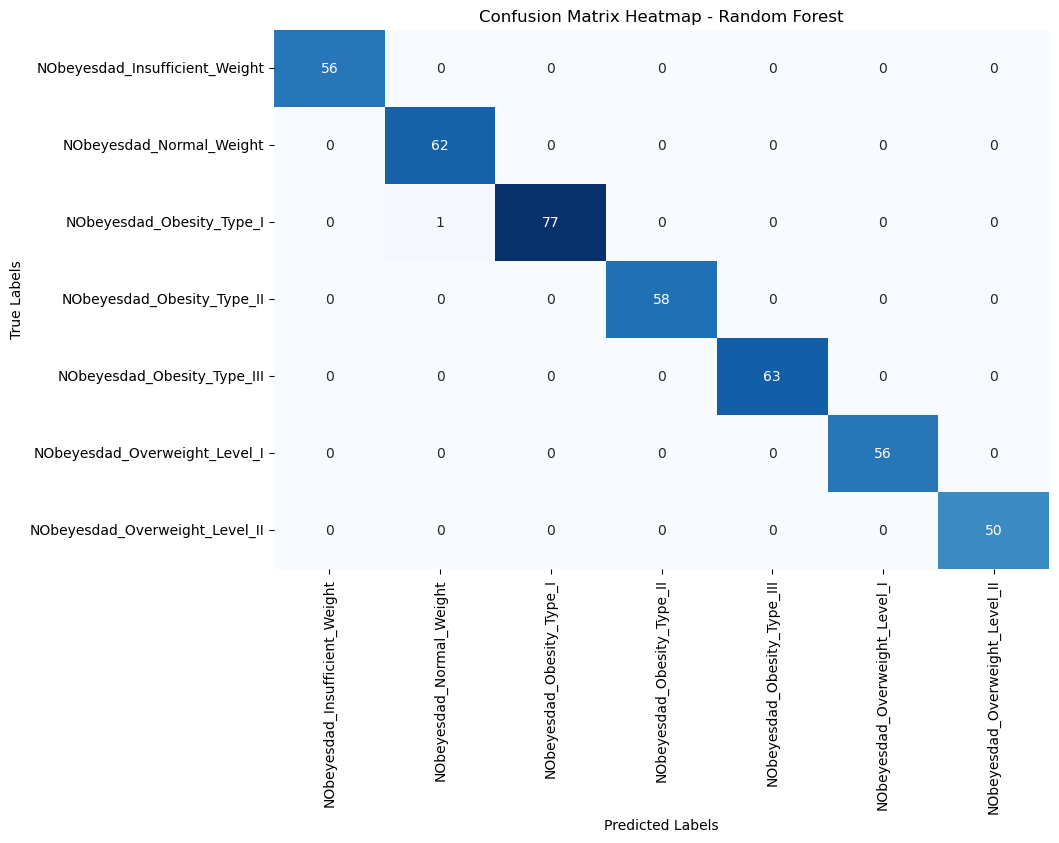

In [31]:
# Get the class labels from the LabelEncoder
class_names = label_encoder.classes_

# Plot the heatmap with class labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - Random Forest')
plt.show()

### *Task 2 :*<span style="color:blue">   Feature Engineering and Scaling</span>

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Scale the continuous variables using MinMaxScaler
scaler = MinMaxScaler()
X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

# Encode binary/categorical columns if needed
binary_cols = ['Gender', 'family_history_with_overweight']
for col in binary_cols:
    X[col] = label_encoder.fit_transform(X[col])

### *Task 3 :*<span style="color:blue">   Train-Test Split</span>

In [33]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, 
                                                    test_size=0.2, random_state=42)

### *Task 4 :*<span style="color:blue">   Machine Learning Model Implementation</span>

> 4.1 **Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

> 4.1 **Random Forest**

In [36]:
# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

### *Task 5 :*<span style="color:blue">    Model Evaluation</span>

> Evaluate both models using accuracy, precision, recall, and F1-score.

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"F1-score: {f1_score(y_true, y_pred, average='weighted'):.2f}\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

Logistic Regression Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Random Forest Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00



## <span style="color:DarkSlateGray">Week 4 :  Model Evaluation and Reporting</span>

### *Task 1 :*<span style="color:blue">    Model Evaluation Report</span>

In [38]:
print("Unique classes in y_test:", set(y_test))
print("Target class labels:", label_encoder.classes_)

Unique classes in y_test: {0, 1, 2, 3, 4, 5, 6}
Target class labels: [0 1]


In [40]:
from sklearn.metrics import classification_report

# Define the correct class names (based on your data)
target_names = [
    'Insufficient_Weight', 'Normal_Weight', 
    'Obesity_Type_I', 'Obesity_Type_II', 
    'Obesity_Type_III', 'Overweight_Level_I', 
    'Overweight_Level_II'
]

# Print classification report for Logistic Regression
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg, target_names=target_names))

# Print classification report for Random Forest
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Logistic Regression - Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        56
      Normal_Weight       0.98      1.00      0.99        62
     Obesity_Type_I       1.00      0.99      0.99        78
    Obesity_Type_II       1.00      1.00      1.00        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       1.00      1.00      1.00        56
Overweight_Level_II       1.00      1.00      1.00        50

           accuracy                           1.00       423
          macro avg       1.00      1.00      1.00       423
       weighted avg       1.00      1.00      1.00       423


Random Forest - Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        56
      Normal_Weight       0.98      1.00      0.99        62
     Obesity_Type_I       1.00      0.99      0.99       